# Manipulating Time Series in Python 
## CHAPTER 1: Working with Time Series in Pandas
### Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting `pd.DatetimeIndex` is a `pd.Timestamp` with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


C:\Users\Acer User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  # Remove the CWD from sys.path while we load stuff.


### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (`ozone`, `pm25`, and carbon monoxide for `NYC`, `2000-2017`) for you to practice the use of `pd.to_datetime()`.

In [ ]:
# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

![output1](output1.png)

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

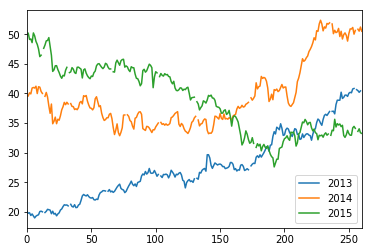

In [14]:
import pandas
import matplotlib.pyplot as plt

yahoo = pandas.read_csv('yahoo.csv')
yahoo.date = pandas.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo = yahoo.asfreq('B')

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year[year]], axis=1)

# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a `DateTimeIndex`, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in `NYC, LA and Chicago` from `2005-17`.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [1]:
import pandas
import matplotlib.pyplot as plt

co = pandas.read_csv('co_cities.csv')
co.date = pandas.to_datetime(co.date)
co.set_index('date', inplace=True)
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


<Figure size 640x480 with 3 Axes>

<Figure size 640x480 with 3 Axes>

### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was `.shift()`, which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

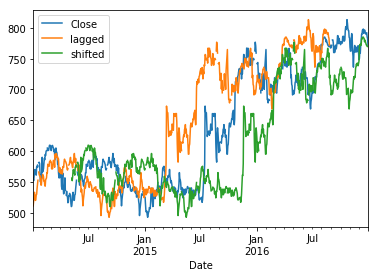

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .`diff()`.

In [6]:
import pandas
import matplotlib.pyplot as plt

yahoo = pandas.read_csv('yahoo.csv')
yahoo.date = pandas.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo = yahoo.asfreq('B')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'].sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print((yahoo.change_30.sub(yahoo.diff_30).value_counts)())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was `.pct_change()`. Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

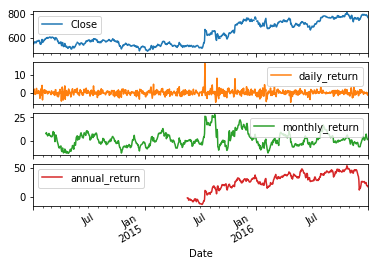

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods=1)*100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30)*100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360)*100

# Plot the result
google.plot(subplots=True)
plt.show()

## CHAPTER 2: Basic Time Series Metrics & Resampling
### Compare the performance of several asset classes
You have seen in the video how you can easily compare several time series by normalizing their starting points to `100`, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: `stocks, bonds, gold, and oil`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


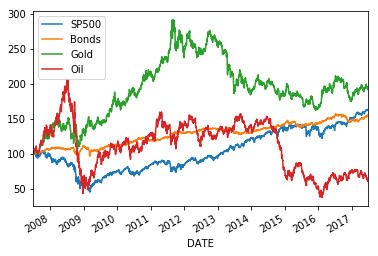

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the `30` largest US companies.

The three largest companies on the NYSE are:

| Company | Stock Ticker  |
| ------- | ------------- |
| Johnson & Johnson | JNJ |
| Exxon Mobil |       XOM |
| JP Morgan Chase | JPM   |

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


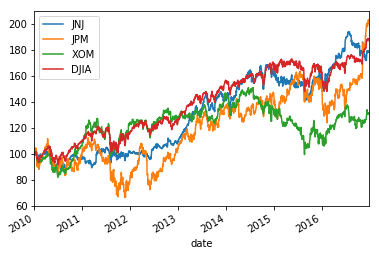

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
first_prices = data.iloc[0]
normalized = data.div(first_prices).mul(100).plot()
plt.show()

### Plot performance difference vs benchmark index
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (`MSFT`) and Apple (`AAPL`) to the `S&P 500` over the last 10 years.

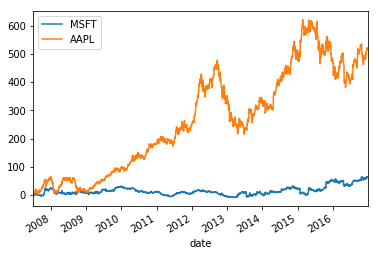

In [13]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Convert monthly to weekly data
You have learned in the video how to use `.reindex()` to conform an existing time series to a `DateTimeIndex` at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [14]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series([1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [ ]:
import pandas as pd

# Import data here
data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(5))

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()

### Use interpolation to create weekly employment data
You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new `.interpolate()` method that you learned about in this video.

In [ ]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

### Interpolate debt/GDP and compare to unemployment
Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
              Debt/GDP  Unemployment
date                                
2010-01-01   87.003860           9.8
2010-02-01   87.559397           9.8
2010-03-01   88.114933           9.9
2010-04-01   88.670470           9.9
2010-05-01   89.135103           9.6
2010-06-01   89.599737           9.4
2010-07-01   90.064370           9.4
2010-08-01   90.738977           9.5
2010-09-01   91.413583           9.5
2010-10-01   92.088190           9.4
2010-11-01   92.607377           9.8
2010-12-01   93.126563           9.3
2011-01-01   93.645750           9.1
2011-02-01   93.353857           9.0
2011-03-01   93.061963           9.0
2011-04-01   92.770070           9.1
2011-05-01   93.476160           9.0
2011-06-01   94.182250           9.1
2011-07-01   94.88834

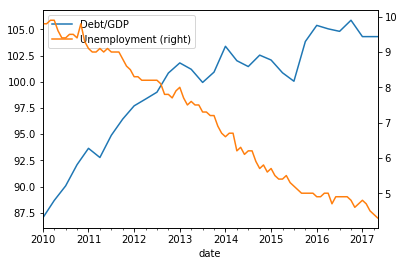

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated)

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

### Compare weekly, monthly and annual ozone trends for NYC & LA
You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


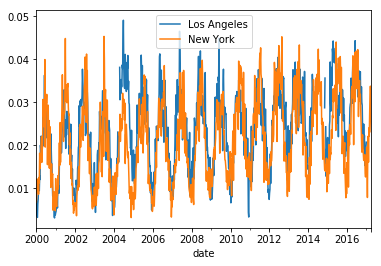

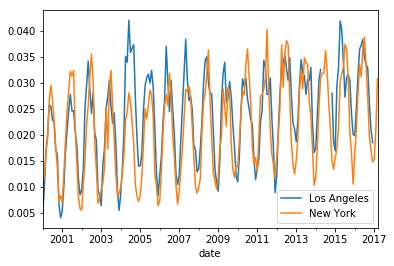

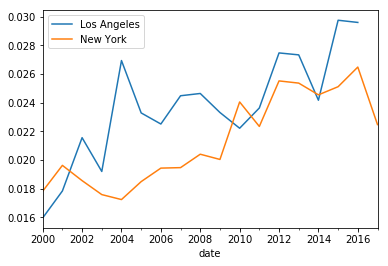

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect data here
ozone = pd.read_csv('ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

### Compare monthly average stock prices for Facebook and Google
Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


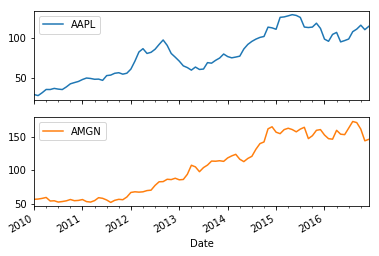

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect data here
stocks = pd.read_csv('stocks_4.csv', parse_dates=['Date'], index_col='Date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average[['AAPL', 'AMGN']].plot(subplots=True)
plt.show()

### Compare quarterly GDP growth rate and stock returns
With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None


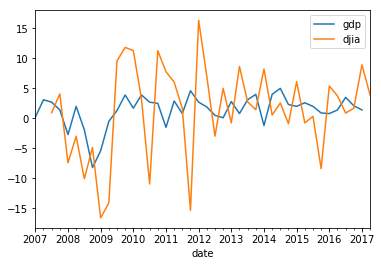

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

### Visualize monthly mean, median and standard deviation of S&P500 returns
You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily `S&P500` returns have trended over the last 10 years.

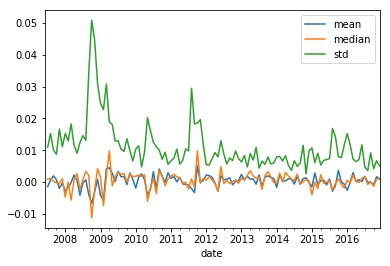

In [4]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()

## CHAPTER 3: Window Functions: Rolling & Expanding Metrics
### Rolling average air quality since 2010 for new york city
The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


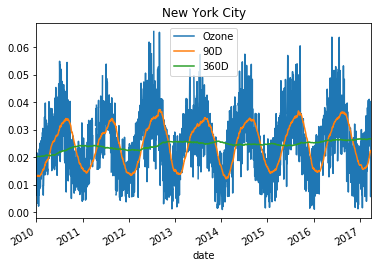

In [8]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()

# Plot data
data.loc['2010':].plot(title='New York City')
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000
The last video also showed you how to calculate several rolling statistics using the `.agg()` method, similar to `.groupby()`.

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and `.agg()` to calculate the rolling median and standard deviation for the daily average ozone values since 2000.

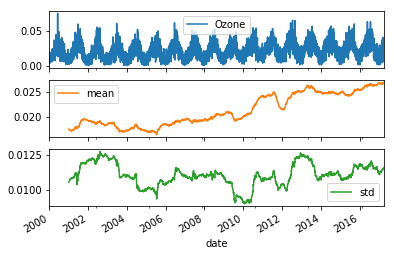

In [11]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window=360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

### Rolling quantiles for daily air quality in nyc
You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


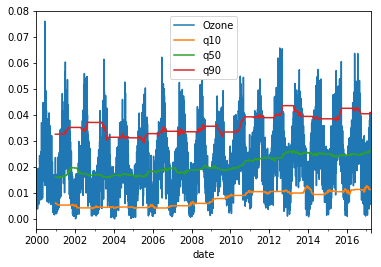

In [12]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.10)
data['q50'] = rolling.quantile(0.50)
data['q90'] = rolling.quantile(0.90)

# Plot monthly returns
data.plot()
plt.show()

### Cumulative `sum` vs `.diff()`
In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the `.diff()` method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [14]:
# Calculate differences
data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

False


### Cumulative return on 1,000 USD invested in google vs apple I
To put your new ability to do cumulative return calculations to practical use, let's compare how much `1,000 USD` would be worth if invested in Google (`'GOOG'`) or Apple (`'AAPL'`) in 2010.

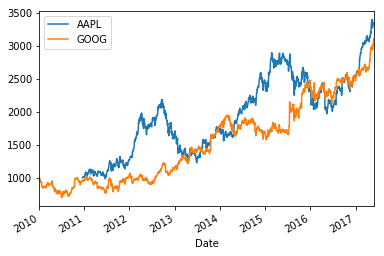

In [24]:
data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

### Cumulative return on 1,000 USD invested in google vs apple II
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

In [ ]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns+1)-1

data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window='360D').apply(multi_period_return)
# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

### Random walk I
In the last video, you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of `numpy`

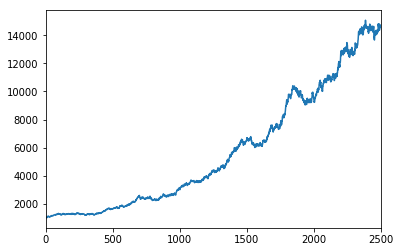

In [54]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from numpy.random import seed, normal, choice

# Set seead here
seed = 42

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

### Random walk II
In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [9]:
import numpy 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from numpy.random import seed, normal, choice

fb = pd.read_csv('fb.csv')
fb.columns=['date', 'price']
fb.date = pd.to_datetime(fb.date)
fb.set_index('date', inplace=True)
# Set seed here
seed = 42

# Calculate daily_returns here
daily_returns = fb.price.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

<Figure size 640x480 with 1 Axes>

### Random walk III
In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

             price  random
date                      
2012-05-18   38.23   38.23
2012-05-21   34.03     NaN
2012-05-22   31.00     NaN
2012-05-23   32.00     NaN
2012-05-24   33.03     NaN
2012-05-25   31.91     NaN
2012-05-29   28.84     NaN
2012-05-30   28.19     NaN
2012-05-31   29.60     NaN
2012-06-01   27.72     NaN
2012-06-04   26.90     NaN
2012-06-05   25.87     NaN
2012-06-06   26.81     NaN
2012-06-07   26.31     NaN
2012-06-08   27.10     NaN
2012-06-11   27.00     NaN
2012-06-12   27.40     NaN
2012-06-13   27.27     NaN
2012-06-14   28.29     NaN
2012-06-15   30.01     NaN
2012-06-18   31.41     NaN
2012-06-19   31.91     NaN
2012-06-20   31.60     NaN
2012-06-21   31.84     NaN
2012-06-22   33.05     NaN
2012-06-25   32.06     NaN
2012-06-26   33.10     NaN
2012-06-27   32.23     NaN
2012-06-28   31.36     NaN
2012-06-29   31.10     NaN
...            ...     ...
2017-04-19  142.27     NaN
2017-04-20  143.80     NaN
2017-04-21  143.68     NaN
2017-04-24  145.47     NaN
2

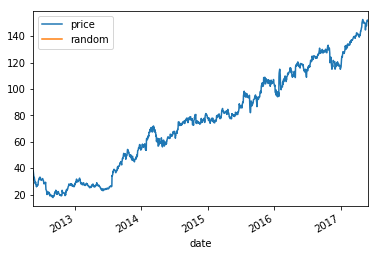

In [10]:
# Select fb start price here
start = fb.price.first('D').dropna()
seed = 42
# Add 1 to random walk and append to start
random_walk = choice(fb.price, size=fb.price.count())
random_walk = pd.Series(random_walk)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()
# Insert into fb and plot
fb['random'] = random_price
print(fb)
fb.plot()
plt.show()

### Annual return correlations among several stocks
You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (`AAPL`), Amazon (`AMZN`), IBM (`IBM`), WalMart (`WMT`), and Exxon Mobile (`XOM`) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.639423 -0.782640 -0.139609 -0.087176 -0.064160  0.196741   
AMGN  0.639423  1.000000 -0.267567 -0.484273  0.265609  0.174887  0.780599   
AMZN -0.782640 -0.267567  1.000000 -0.221807  0.157860  0.147352  0.161325   
CPRT -0.139609 -0.484273 -0.221807  1.000000 -0.141719  0.215925 -0.407780   
EL   -0.087176  0.265609  0.157860 -0.141719  1.000000 -0.612696 -0.076387   

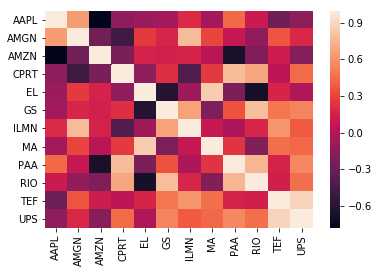

In [11]:
data = pd.read_csv('market_cap_series.csv', parse_dates=['Date'], index_col='Date')

# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
# annot = True shows values in each cell
sns.heatmap(correlations)
plt.show()

## CHAPTER 4: Putting it all together: Building a value-weighted index
### Explore and clean company listing information
To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the `NYSE`, the `NASDAQ` and the `AMEX`.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the `NYSE, NASDAQ, and AMEX`. The column `'Market Capitalization'` is already measured in USD mn.

In [12]:
listings = pd.read_excel('listings.xlsx')
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby(['Sector']).size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
Stock Symbol             360 non-null object
Company Name             360 non-null object
Last Sale                346 non-null float64
Market Capitalization    360 non-null float64
IPO Year                 105 non-null float64
Sector                   238 non-null object
Industry                 238 non-null object
dtypes: float64(3), object(4)
memory usage: 19.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
Company Name             45 non-null object
Last Sale                45 non-null float64
Market Capitalization    45 non-null float64
IPO Year                 45 non-null float64
Sector                   45 non-null object
Industry                 45 non-null object
dtypes: float64(3), object(3)
memory usage: 2.5+ KB
None
Sector
Health Care              11
Consumer Services         9
Basic Industries          8
Capi

### Select and inspect index components
Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [13]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
columns = ['Company Name', 'Market Capitalization', 'Last Sale']
info_cols = listings.loc[tickers, columns]
print(info_cols.sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
CQP                Cheniere Energy Partners, LP           1.104692e+10   
SEB                        Seaboard Corporatio

### Import index component price information
Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, XXII to ZDGE
Data columns (total 6 columns):
Company Name             360 non-null object
Last Sale                346 non-null float64
Market Capitalization    360 non-null float64
IPO Year                 105 non-null float64
Sector                   238 non-null object
Industry                 238 non-null object
dtypes: float64(3), object(3)
memory usage: 19.7+ KB
None
Index(['BTG', 'GRC', 'CCF', 'BTI', 'GSAT', 'IMO', 'SEB', 'TXMD', 'VHC', 'LNG',
       'MJCO', 'RLGT'],
      dtype='object', name='Stock Symbol')
Index(['BTG', 'GRC', 'CCF', 'BTI', 'GSAT', 'IMO', 'SEB', 'TXMD', 'VHC', 'LNG',
       'MJCO', 'RLGT'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64

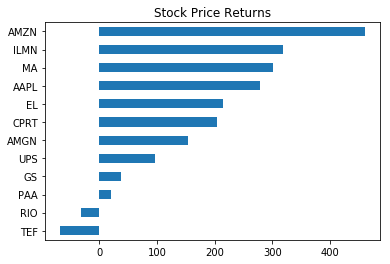

In [5]:
listings = pd.read_excel('listings.xlsx')

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Inspect listings
print(listings.info())

# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
# Select stock symbols and print the result

tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('stocks_4.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns    
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(title='Stock Price Returns', kind='barh')
plt.show()

In [39]:
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers,['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head(5))

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))
components = pd.concat([components, no_shares], axis='columns')
components.columns = [['Market Capitalization', 'Last Sale', 'Number of Shares']]
print(components)

Index(['BTG', 'GRC', 'CCF', 'BTI', 'GSAT', 'IMO', 'SEB', 'TXMD', 'VHC', 'LNG',
       'MJCO', 'RLGT'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
BTG                    2.812163e+09       2.89
GRC                    7.339995e+08      28.13
CCF                    8.970777e+08      96.00
BTI                    1.144246e+11      67.24
GSAT                   1.931551e+09       1.73
Stock Symbol
BTI     1.701734e+09
GSAT    1.116503e+09
BTG     9.730666e+08
IMO     8.475990e+08
LNG     2.378596e+08
TXMD    1.975239e+08
VHC     5.814489e+07
RLGT    4.880325e+07
MJCO    3.649803e+07
GRC     2.609312e+07
CCF     9.344559e+06
SEB     1.170550e+06
dtype: float64
             Market Capitalization Last Sale Number of Shares
Stock Symbol                                                 
BTG                   2.812163e+09      2.89     9.730666e+08
GRC                   7.339995e+08     28.13     2.609312e+

### Create time series of market value
You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [ ]:
# Import prices and inspect result
stock_prices = pd.read_csv('stocks_4.csv', parse_dates=['Date'], index_col='Date').dropna()
print(stock_prices.head(5))

# Select the number of shares
no_shares = components['Number of Shares'].dropna()
print(no_shares)

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

### Calculate & plot the composite index
By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [ ]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

### Calculate the contribution of each stock to the index
You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

index = pd.read_csv('index.csv', parse_dates=['Date'], index_col='Date')

# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0]-1) * (100)
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

### Compare index performance against benchmark
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the `S&P 500` as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

Index    126.658267
DJIA      86.722172
dtype: float64


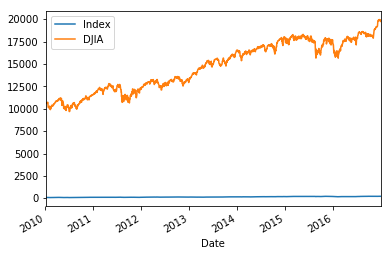

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
Index    1761 non-null float64
DJIA     1761 non-null float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index      DJIA
Date                            
2010-01-04  100.000000  10583.96
2010-01-05  100.457394  10572.02
2010-01-06   99.981005  10573.68
2010-01-07   99.485328  10606.86
2010-01-08  100.148231  10618.19


C:\Users\Acer User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


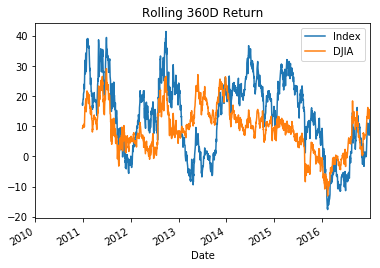

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

index = pd.read_csv('index.csv')
djia  = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')

index.columns=['Date', 'Index']
index.Date = pd.to_datetime(index.Date)
index.set_index('Date', inplace=True)
index = index['Index']
index = pd.Series(index)

# Convert index series to dataframe here
data = index.to_frame(name='Index')

# Normalize djia series and add as new column to data
data['DJIA'] = djia

# Show total return for both index and djia
print((data.iloc[-1]/data.iloc[0]-1)*100)

# Plot both series
data.plot()
plt.show()

# Inspect data
print(data.info())
print(data.head(5))

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1)-1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling(window='360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

### Visualize your index constituent correlations
To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   

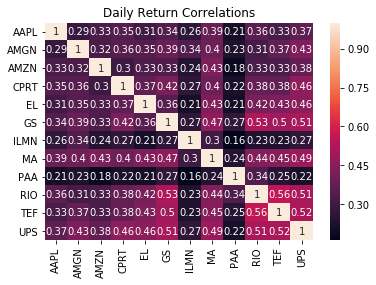

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock_prices = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.squeeze().pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

### Save your analysis to multiple excel worksheets
Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

index = pd.read_csv('index.csv')
djia  = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
stock_prices = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')

# Inspect stock_prices here
print(stock_prices.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


### Save your analysis to multiple excel worksheets
Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.

In [28]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.squeeze().pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')
    writer.save()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
Date          1761 non-null object
Unnamed: 1    1761 non-null float64
dtypes: float64(1), object(1)
memory usage: 27.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Data columns (total 14 columns):
AAPL          1761 non-null float64
AMGN          1761 non-null float64
AMZN          1761 non-nu